# Week 3 - Assignment 2
## Analysis of the household income per census tract in LA County
### Alain Jabbour

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib

In [2]:
geojson_path = 'Median_Income_and_AMI_(census_tract).geojson'

In [3]:
df = gpd.read_file(geojson_path)

In [4]:
df.shape

(2495, 14)

In [5]:
df.head(5)

tract  med_hh_income  med_hh_income_universe     ami_category  \
0  06037199700        38892.0                    1204  Very Low Income   
1  06037199801        41027.0                     903  Very Low Income   
2  06037199802        42500.0                     612  Very Low Income   
3  06037199900        37232.0                     845  Very Low Income   
4  06037201110        65000.0                     782       Low Income   

  below_med_income below_60pct_med_income below_moderate_income    sup_dist  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                     No                   Yes  District 1   

                                csa            spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Wholesale District  SPA 4 - Metro      2347  1.041050e+07   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro      2348  3.724107e+06   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro      2349  3.296129e+06   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro      2350  4.782361e+06   
4           Los Angeles - El Sereno  SPA 4 - Metro      2351  1.099246e+07   

   Shape__Length                                           geometry  
0   13808.463241  POLYGON ((-118.22672 34.06242, -118.22453 34.0...  
1    9459.391827  POLYGON ((-118.21559 34.07186, -118.21169 34.0...  
2    8868.744225  POLYGON ((-118.21563 34.07365, -118.21309 34.0...  
3   10141.728022  POLYGON ((-118.21528 34.06349, -118.21547 34.0...  
4   15893.383636  POLYGON ((-118.18182 34.09277, -118.18039 34.0...

In [6]:
df.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2495 entries, 0 to 2494
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   tract                   2495 non-null   object  
 1   med_hh_income           2458 non-null   float64 
 2   med_hh_income_universe  2495 non-null   int64   
 3   ami_category            2458 non-null   object  
 4   below_med_income        2458 non-null   object  
 5   below_60pct_med_income  2458 non-null   object  
 6   below_moderate_income   2458 non-null   object  
 7   sup_dist                2495 non-null   object  
 8   csa                     2495 non-null   object  
 9   spa                     2495 non-null   object  
 10  ESRI_OID                2495 non-null   int64   
 11  Shape__Area             2495 non-null   float64 
 12  Shape__Length           2495 non-null   float64 
 13  geometry                2495 non-null   geometry
dtypes: float64(3), g

In [7]:
df['med_hh_income'].head

<bound method NDFrame.head of 0        38892.0
1        41027.0
2        42500.0
3        37232.0
4        65000.0
          ...   
2490    126450.0
2491    107672.0
2492    104439.0
2493    131012.0
2494     90280.0
Name: med_hh_income, Length: 2495, dtype: float64>

In [8]:
df['med_hh_income'].mean()

76849.3344182262

In [9]:
#general statistical analysis
df['med_hh_income'].describe()

count      2458.000000
mean      76849.334418
std       35546.132788
min        4918.000000
25%       51157.500000
50%       69698.000000
75%       94515.500000
max      250001.000000
Name: med_hh_income, dtype: float64

<Axes: ylabel='Frequency'>

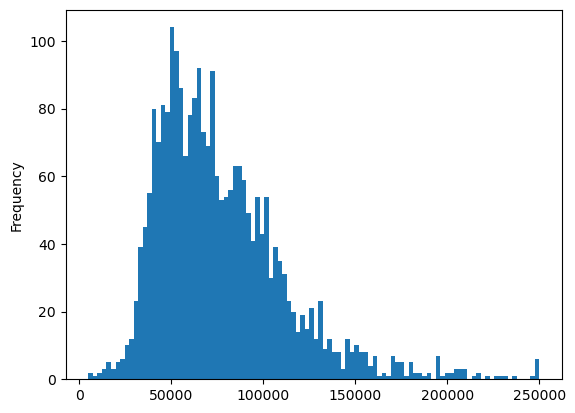

In [10]:
df['med_hh_income'].plot.hist(bins=100)

In [11]:
#sorting from high to low
df_sorted=df.sort_values(by='med_hh_income',ascending=False)
df_sorted.head(20)

tract  med_hh_income  med_hh_income_universe  \
1303  06037262100       250001.0                    1071   
1308  06037262400       250001.0                    1101   
1930  06037141700       250001.0                    1242   
1307  06037262303       250001.0                    1063   
2090  06037980019       250001.0                      37   
1196  06037670500       250000.0                     550   
1309  06037262501       246750.0                    1335   
1384  06037800206       236709.0                    1171   
1305  06037262301       231188.0                     809   
2375  06037194300       228836.0                    1389   
1387  06037800328       225819.0                     369   
818   06037460800       221375.0                    1137   
1301  06037261104       217396.0                     633   
815   06037460502       216750.0                    1400   
875   06037620901       215156.0                    1081   
1197  06037670603       209500.0                     594   
1215  06037701201       209083.0                    1425   
1789  06037139705       208381.0                    1291   
2310  06037400205       207270.0                     849   
1057  06037670324       207096.0                    1995   

               ami_category below_med_income below_60pct_med_income  \
1303  Above Moderate Income               No                     No   
1308  Above Moderate Income               No                     No   
1930  Above Moderate Income               No                     No   
1307  Above Moderate Income               No                     No   
2090  Above Moderate Income               No                     No   
1196  Above Moderate Income               No                     No   
1309  Above Moderate Income               No                     No   
1384  Above Moderate Income               No                     No   
1305  Above Moderate Income               No                     No   
2375  Above Moderate Income               No                     No   
1387  Above Moderate Income               No                     No   
818   Above Moderate Income               No                     No   
1301  Above Moderate Income               No                     No   
815   Above Moderate Income               No                     No   
875   Above Moderate Income               No                     No   
1197  Above Moderate Income               No                     No   
1215  Above Moderate Income               No                     No   
1789  Above Moderate Income               No                     No   
2310  Above Moderate Income               No                     No   
1057  Above Moderate Income               No                     No   

     below_moderate_income    sup_dist  \
1303                    No  District 3   
1308                    No  District 3   
1930                    No  District 3   
1307                    No  District 3   
2090                    No  District 3   
1196                    No  District 4   
1309                    No  District 3   
1384                    No  District 3   
1305                    No  District 3   
2375                    No  District 3   
1387                    No  District 3   
818                     No  District 5   
1301                    No  District 3   
815                     No  District 5   
875                     No  District 2   
1197                    No  District 4   
1215                    No  District 3   
1789                    No  District 3   
2310                    No  District 5   
1057                    No  District 4   

                                          csa                   spa  ESRI_OID  \
1303                    Los Angeles - Bel Air          SPA 5 - West      3650   
1308          Los Angeles - Mandeville Canyon          SPA 5 - West      3655   
1930               Los Angeles - Sherman Oaks  SPA 2 - San Fernando      4277   
1307                  Los Angeles - Brentwood       

<Axes: >

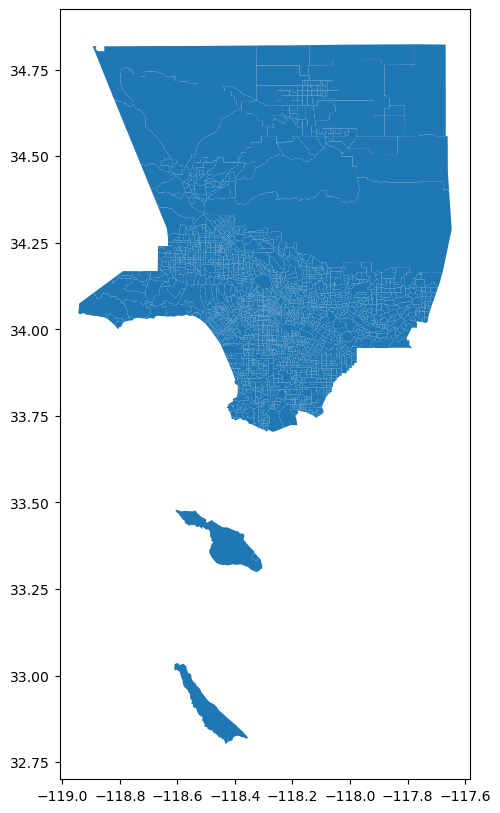

In [12]:
df.plot(figsize=(12,10))

In [13]:
#using the matplotlib colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

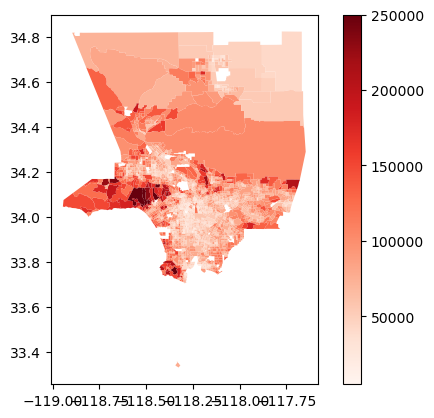

In [52]:
#plotting the data in a continuous color representation
norm = Normalize(vmin=df['med_hh_income'].min(), vmax=df['med_hh_income'].max())
df.plot(column='med_hh_income', cmap='Reds', norm=norm, legend=True)
plt.savefig('incomemap2.png', dpi=1000)

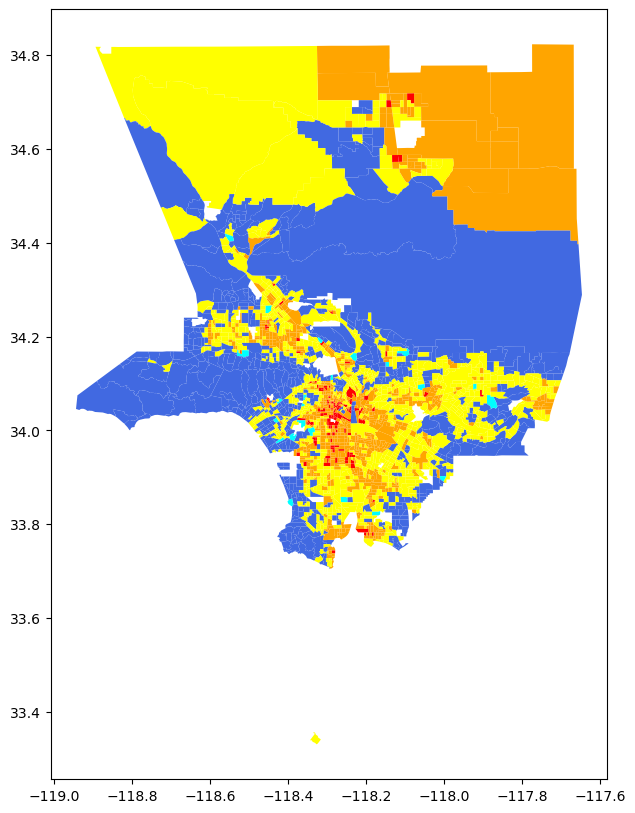

In [15]:
#color_dict = {'Above Moderate Income': 'orange', 'Moderate Income': 'yellow', 'Low Income': 'cyan' ,'Very Low Income': 'royalblue', 'Extremely Low Income': 'blue'}
colors = ["royalblue", "red", "yellow", "cyan","orange"]
cmap = matplotlib.colors.ListedColormap(colors)
df.plot(figsize=(12,10),
                 column='ami_category',
        cmap=cmap,
                 legend=False
       )
plt.savefig('incomemap.png', dpi=1000)

<Axes: >

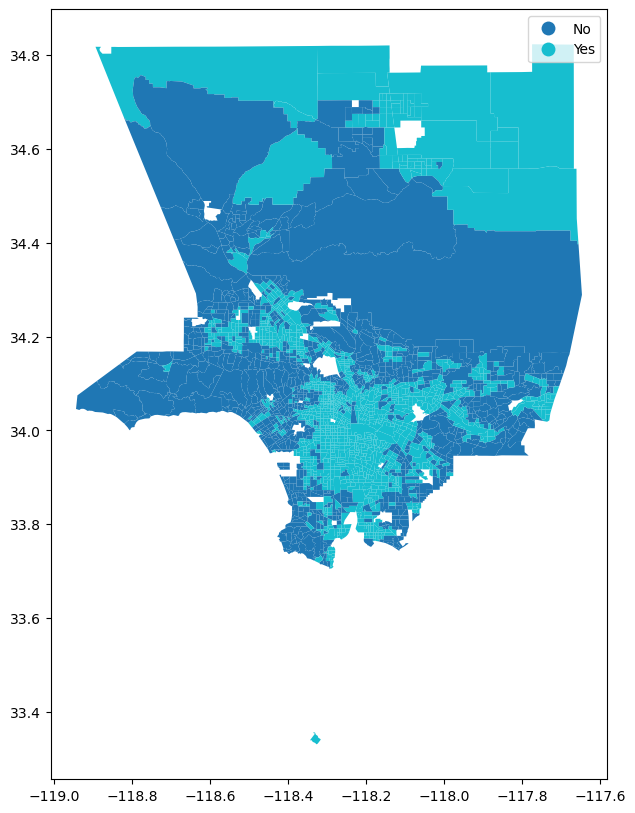

In [16]:
df.plot(figsize=(12,10),
                 column='below_med_income',
                 legend=True)

<Axes: >

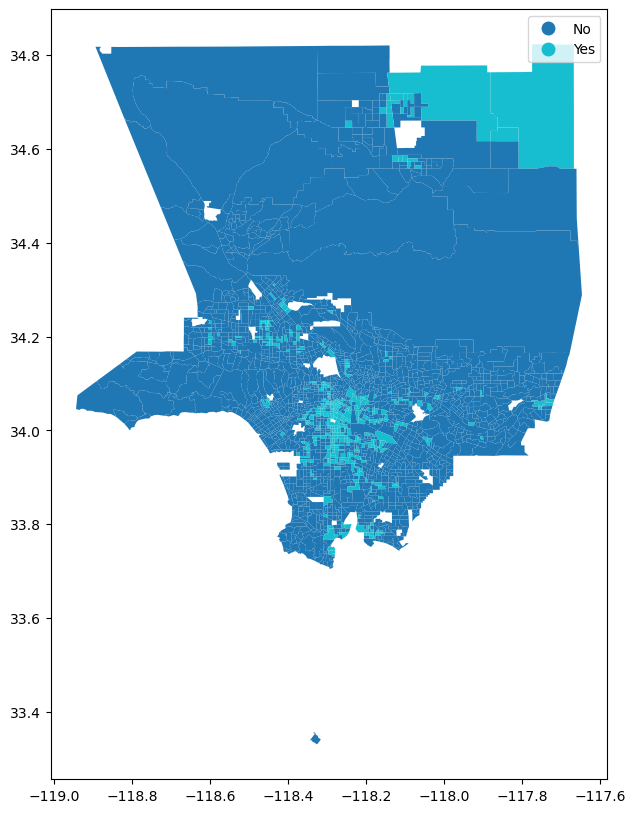

In [17]:
df.plot(figsize=(12,10),
                 column='below_60pct_med_income',
                 legend=True)

<Axes: >

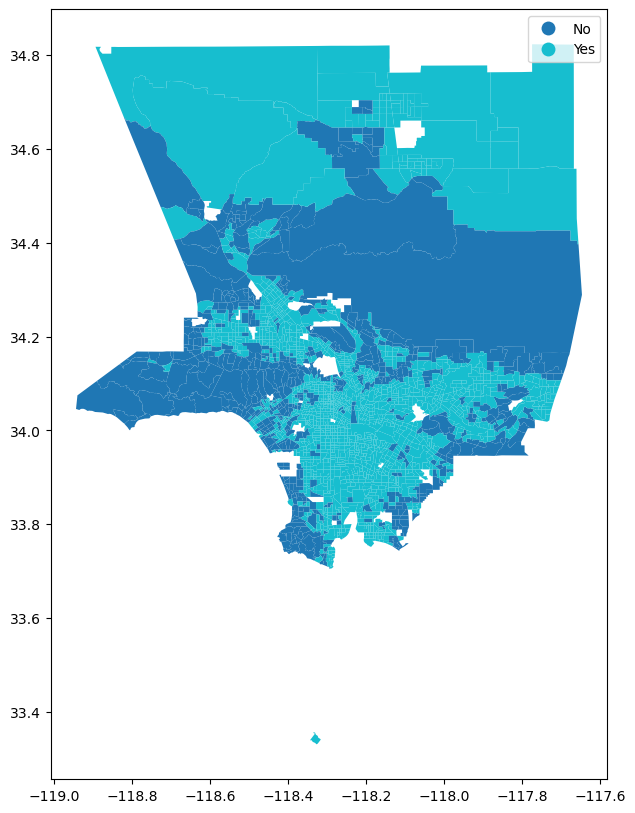

In [18]:
df.plot(figsize=(12,10),
                 column='below_moderate_income',
                 legend=True)

In [23]:
metro=gpd.read_file('Stations_Rail.zip')
metro

LINE  LINENUM  LINENUM2  STNSEQ  STNSEQ2    DIR  STOPNUM  \
0   Blue      801         0      21        0   None    80101   
1   Blue      801         0      22        0  North    80102   
2   Blue      801         0      18        0   None    80105   
3   Blue      801         0      17        0   None    80106   
4   Blue      801         0      16        0   None    80107   
..   ...      ...       ...     ...      ...    ...      ...   
91  Gold      804         0       5        0   None    80423   
92  Gold      804         0       4        0   None    80424   
93  Gold      804         0       3        0   None    80425   
94  Gold      804         0       2        0   None    80426   
95  Gold      804         0       1        0   None    80427   

                          STATION        LAT        LONG  TPIS_NAME  \
0     Downtown Long Beach Station  33.768071 -118.192921   Long Bch   
1             Pacific Ave Station  33.772258 -118.193700    Pacific   
2          Anaheim Street Station  33.781830 -118.189384    Anaheim   
3       Pacific Coast Hwy Station  33.789090 -118.189382        PCH   
4           Willow Street Station  33.807079 -118.189834     Willow   
..                            ...        ...         ...        ...   
91               Monrovia Station  34.133155 -118.003473   Monrovia   
92  Duarte / City of Hope Station  34.132518 -117.967680     Duarte   
93              Irwindale Station  34.129048 -117.932506  Irwindale   
94         Azusa Downtown Station  34.135863 -117.906631      Azusa   
95   APU / Citrus College Station  34.136814 -117.891636    APU/Cit   

         POINT_X       POINT_Y                     geometry  
0   6.503030e+06  1.738034e+06  POINT (-118.19292 33.76807)  
1   6.502796e+06  1.739558e+06  POINT (-118.19370 33.77226)  
2   6.504115e+06  1.743039e+06  POINT (-118.18938 33.78183)  
3   6.504120e+06  1.745681e+06  POINT (-118.18938 33.78909)  
4   6.503995e+06  1.752228e+06  POINT (-118.18983 33.80708)  
..           ...           ...                          ...  
91  6.560616e+06  1.870840e+06  POINT (-118.00347 34.13316)  
92  6.571447e+06  1.870610e+06  POINT (-117.96768 34.13252)  
93  6.582093e+06  1.869352e+06  POINT (-117.93251 34.12905)  
94  6.589921e+06  1.871838e+06  POINT (-117.90663 34.13586)  
95  6.594458e+06  1.872189e+06  POINT (-117.89164 34.13681)  

[96 rows x 14 columns]

In [26]:
pip install mapclassify

  Obtaining dependency information for mapclassify from https://files.pythonhosted.org/packages/3f/f1/8db36df379703311c16e5341b408dad04e34cfded66f38e351c380fbd5ae/mapclassify-2.6.1-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [27]:
import folium
import matplotlib
import mapclassify

In [44]:
m = df.explore( #” tracts_combined” is the dataframe the column of  “Percent_of_Population_Over_65" included
    column="ami_category",  # make choropleth based on "Percent_of_Population_Over_65" column
    legend=True, # show legend
    k=10,  # use 10 bins
    tooltip=False,  # hide tooltip
    popup=["ami_category"],  # show popup (on-click)
    legend_kwds=dict(colorbar=False),  # do not use colorbar
    name="Household income categories",  # name of the layer in the map
    colors = ["royalblue", "red", "yellow", "cyan","orange"],
    cmap = matplotlib.colors.ListedColormap(colors)
)

metro.explore( #”metro” is the dataframe of metro stations’ points
    m=m,  # pass the map object
    color="brown",  # use red color on all points
    marker_kwds=dict(radius=5, fill=True),  # make marker radius 10px with fill
    tooltip=False,  # hide tooltip
    tooltip_kwds=dict(labels=False),  # do not show column label in the tooltip
    name="metro stations",  # name of the layer in the map
)

folium.TileLayer("CartoDB positron", show=False).add_to(
    m
)  # use folium to add alternative tiles
folium.LayerControl().add_to(m)  # use folium to add layer control

m.save('Percent_of_Population_Over_65.html')
m  # show map


In [54]:
df2=gpd.read_file('Without_Vehicle.geojson')
df2.head()

tract  no_vehicle  no_vehicle_universe  no_vehicle_pct    sup_dist  \
0  06037101110         192                 1494            12.9  District 5   
1  06037101122           9                 1372             0.7  District 5   
2  06037101220          73                 1357             5.4  District 5   
3  06037101221         215                 1450            14.8  District 5   
4  06037101222         196                  935            21.0  District 5   

                     csa                   spa  ESRI_OID   Shape__Area  \
0  Los Angeles - Tujunga  SPA 2 - San Fernando      4842  1.232981e+07   
1  Los Angeles - Tujunga  SPA 2 - San Fernando      4843  2.908866e+07   
2  Los Angeles - Tujunga  SPA 2 - San Fernando      4844  7.532651e+06   
3  Los Angeles - Tujunga  SPA 2 - San Fernando      4845  3.874399e+06   
4  Los Angeles - Tujunga  SPA 2 - San Fernando      4846  3.090538e+06   

   Shape__Length                                           geometry  
0   14765.649004  POLYGON ((-118.30077 34.25961, -118.30077 34.2...  
1   30028.213771  POLYGON ((-118.30321 34.27334, -118.29971 34.2...  
2   12504.552130  POLYGON ((-118.28594 34.25228, -118.28594 34.2...  
3    8938.421349  POLYGON ((-118.29946 34.25598, -118.29319 34.2...  
4    9750.960420  POLYGON ((-118.29319 34.25233, -118.28863 34.2...

In [57]:
dfmerged=pd.merge(df, df2, on='csa', how='inner')
dfmerged.head()

tract_x  med_hh_income  med_hh_income_universe     ami_category  \
0  06037199700        38892.0                    1204  Very Low Income   
1  06037199700        38892.0                    1204  Very Low Income   
2  06037199700        38892.0                    1204  Very Low Income   
3  06037199700        38892.0                    1204  Very Low Income   
4  06037199700        38892.0                    1204  Very Low Income   

  below_med_income below_60pct_med_income below_moderate_income  sup_dist_x  \
0              Yes                    Yes                   Yes  District 1   
1              Yes                    Yes                   Yes  District 1   
2              Yes                    Yes                   Yes  District 1   
3              Yes                    Yes                   Yes  District 1   
4              Yes                    Yes                   Yes  District 1   

                                csa          spa_x  ...      tract_y  \
0  Los Angeles - Wholesale District  SPA 4 - Metro  ...  06037206020   
1  Los Angeles - Wholesale District  SPA 4 - Metro  ...  06037206303   
2  Los Angeles - Wholesale District  SPA 4 - Metro  ...  06037199700   
3  Los Angeles - Wholesale District  SPA 4 - Metro  ...  06037203500   
4  Los Angeles - Wholesale District  SPA 4 - Metro  ...  06037206010   

   no_vehicle  no_vehicle_universe no_vehicle_pct  sup_dist_y          spa_y  \
0           3                  262            1.1  District 1  SPA 4 - Metro   
1         485                  629           77.1  District 1  SPA 4 - Metro   
2         133                 1213           11.0  District 1  SPA 4 - Metro   
3         240                  970           24.7  District 1  SPA 4 - Metro   
4         367                 1474           24.9  District 1  SPA 4 - Metro   

   ESRI_OID_y  Shape__Area_y Shape__Length_y  \
0        5305   9.395603e+06    11938.556360   
1        5319   4.692073e+06    10612.528556   
2        5385   1.041050e+07    13808.463241   
3        5406   1.789689e+07    18825.822753   
4        5426   1.571430e+07    20599.431194   

                                          geometry_y  
0  POLYGON ((-118.23790 34.05411, -118.23680 34.0...  
1  POLYGON ((-118.24525 34.04226, -118.24390 34.0...  
2  POLYGON ((-118.22672 34.06242, -118.22453 34.0...  
3  POLYGON ((-118.22625 34.05593, -118.22692 34.0...  
4  POLYGON ((-118.23701 34.06870, -118.23463 34.0...  

[5 rows x 24 columns]

In [73]:
import numpy as np

Text(0.5, 1.0, 'Median Household Income and Car Ownership in LA County')

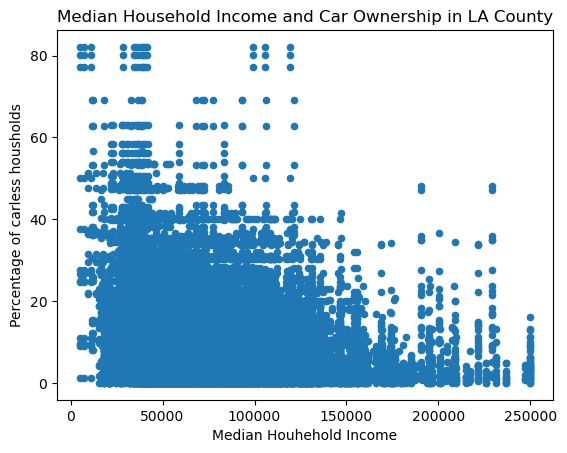

In [77]:
ax=dfmerged.plot.scatter(x='med_hh_income',y='no_vehicle_pct')
ax.set_xlabel('Median Houhehold Income')
ax.set_ylabel('Percentage of carless housholds')
ax.set_title('Median Household Income and Car Ownership in LA County')


In [98]:
df3=pd.read_csv('means_of_commute.csv')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2346 entries, 0 to 2345
Columns: 811 entries, GEO_ID to S0802_C04_101M
dtypes: float64(1), int64(49), object(761)
memory usage: 14.5+ MB


C:\Users\utilisateur\AppData\Local\Temp\ipykernel_17528\3619467194.py:1: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,197,199,201,211,212,217,218,223,224,229,230,235,236,241,242,247,248,253,254,259,260,265,266,271,272,277,278,283,284,289,290,295,296,301,302,307,308,313,314,319,320,325,326,331,332,337,338,343,344,349,350,355,356,361,362,373,374,379,380,385,386,391,392,397,398,403,404,409,410,415,416,457,458,463,464,469,470,475,476,481,482,487,488,493,494,499,500,50

In [94]:
df3['tract']= df3['tract'].astype(str)
df3['tract'] = df['tract'].apply(lambda x: x.zfill(11))
df3.head()

GEO_ID        tract                                               NAME  \
0  1400000U  06037199700  Census Tract 1011.10, Los Angeles County, Cali...   
1  1400000U  06037199801  Census Tract 1011.22, Los Angeles County, Cali...   
2  1400000U  06037199802  Census Tract 1012.10, Los Angeles County, Cali...   
3  1400000U  06037199900  Census Tract 1012.20, Los Angeles County, Cali...   
4  1400000U  06037201110  Census Tract 1013, Los Angeles County, California   

   S0802_C01_001E  S0802_C01_001M S0802_C01_002E S0802_C01_002M  \
0            1927             271            0.0            1.8   
1            1907             181            0.4            0.7   
2            2770             397            0.6            0.9   
3            1513             239            3.7            2.9   
4            2041             213            1.1            1.2   

  S0802_C01_003E S0802_C01_003M S0802_C01_004E  ... S0802_C03_100E  \
0            5.8            4.3           45.8  ...            (X)   
1            5.1            3.2           34.2  ...            (X)   
2           10.4            5.4           50.1  ...            (X)   
3            8.3            5.2           43.0  ...            (X)   
4            4.8            2.3           34.4  ...            (X)   

  S0802_C03_100M S0802_C04_100E S0802_C04_100M S0802_C02_101E S0802_C02_101M  \
0            (X)            (X)            (X)            (X)            (X)   
1            (X)            (X)            (X)            (X)            (X)   
2            (X)            (X)            (X)            (X)            (X)   
3            (X)            (X)            (X)            (X)            (X)   
4            (X)            (X)            (X)            (X)            (X)   

  S0802_C03_101E S0802_C03_101M S0802_C04_101E S0802_C04_101M  
0            (X)            (X)            (X)            (X)  
1            (X)            (X)            (X)            (X)  
2            (X)            (X)            (X)            (X)  
3            (X)            (X)            (X)            (X)  
4            (X)            (X)            (X)            (X)  

[5 rows x 811 columns]

In [88]:
df3.rename(columns={'tract_x': 'tract'}, inplace=True)
df3.head()

GEO_ID       tract                                               NAME  \
0  1400000U  6037101110  Census Tract 1011.10, Los Angeles County, Cali...   
1  1400000U  6037101122  Census Tract 1011.22, Los Angeles County, Cali...   
2  1400000U  6037101210  Census Tract 1012.10, Los Angeles County, Cali...   
3  1400000U  6037101220  Census Tract 1012.20, Los Angeles County, Cali...   
4  1400000U  6037101300  Census Tract 1013, Los Angeles County, California   

   S0802_C01_001E  S0802_C01_001M S0802_C01_002E S0802_C01_002M  \
0            1927             271            0.0            1.8   
1            1907             181            0.4            0.7   
2            2770             397            0.6            0.9   
3            1513             239            3.7            2.9   
4            2041             213            1.1            1.2   

  S0802_C01_003E S0802_C01_003M S0802_C01_004E  ... S0802_C03_100E  \
0            5.8            4.3           45.8  ...            (X)   
1            5.1            3.2           34.2  ...            (X)   
2           10.4            5.4           50.1  ...            (X)   
3            8.3            5.2           43.0  ...            (X)   
4            4.8            2.3           34.4  ...            (X)   

  S0802_C03_100M S0802_C04_100E S0802_C04_100M S0802_C02_101E S0802_C02_101M  \
0            (X)            (X)            (X)            (X)            (X)   
1            (X)            (X)            (X)            (X)            (X)   
2            (X)            (X)            (X)            (X)            (X)   
3            (X)            (X)            (X)            (X)            (X)   
4            (X)            (X)            (X)            (X)            (X)   

  S0802_C03_101E S0802_C03_101M S0802_C04_101E S0802_C04_101M  
0            (X)            (X)            (X)            (X)  
1            (X)            (X)            (X)            (X)  
2            (X)            (X)            (X)            (X)  
3            (X)            (X)            (X)            (X)  
4            (X)            (X)            (X)            (X)  

[5 rows x 811 columns]

In [96]:
dfmerged2=pd.merge(df3, df, on='tract', how='inner')
dfmerged2.head()

GEO_ID        tract                                               NAME  \
0  1400000U  06037199700  Census Tract 1011.10, Los Angeles County, Cali...   
1  1400000U  06037199801  Census Tract 1011.22, Los Angeles County, Cali...   
2  1400000U  06037199802  Census Tract 1012.10, Los Angeles County, Cali...   
3  1400000U  06037199900  Census Tract 1012.20, Los Angeles County, Cali...   
4  1400000U  06037201110  Census Tract 1013, Los Angeles County, California   

   S0802_C01_001E  S0802_C01_001M S0802_C01_002E S0802_C01_002M  \
0            1927             271            0.0            1.8   
1            1907             181            0.4            0.7   
2            2770             397            0.6            0.9   
3            1513             239            3.7            2.9   
4            2041             213            1.1            1.2   

  S0802_C01_003E S0802_C01_003M S0802_C01_004E  ... below_med_income  \
0            5.8            4.3           45.8  ...              Yes   
1            5.1            3.2           34.2  ...              Yes   
2           10.4            5.4           50.1  ...              Yes   
3            8.3            5.2           43.0  ...              Yes   
4            4.8            2.3           34.4  ...              Yes   

  below_60pct_med_income below_moderate_income    sup_dist  \
0                    Yes                   Yes  District 1   
1                    Yes                   Yes  District 1   
2                    Yes                   Yes  District 1   
3                    Yes                   Yes  District 1   
4                     No                   Yes  District 1   

                                csa            spa ESRI_OID   Shape__Area  \
0  Los Angeles - Wholesale District  SPA 4 - Metro     2347  1.041050e+07   
1     Los Angeles - Lincoln Heights  SPA 4 - Metro     2348  3.724107e+06   
2     Los Angeles - Lincoln Heights  SPA 4 - Metro     2349  3.296129e+06   
3     Los Angeles - Lincoln Heights  SPA 4 - Metro     2350  4.782361e+06   
4           Los Angeles - El Sereno  SPA 4 - Metro     2351  1.099246e+07   

  Shape__Length                                           geometry  
0  13808.463241  POLYGON ((-118.22672 34.06242, -118.22453 34.0...  
1   9459.391827  POLYGON ((-118.21559 34.07186, -118.21169 34.0...  
2   8868.744225  POLYGON ((-118.21563 34.07365, -118.21309 34.0...  
3  10141.728022  POLYGON ((-118.21528 34.06349, -118.21547 34.0...  
4  15893.383636  POLYGON ((-118.18182 34.09277, -118.18039 34.0...  

[5 rows x 824 columns]

In [97]:
ax=dfmerged2.plot.bar(x='med_hh_income',y='no_vehicle_pct')
ax.set_xlabel('Median Houhehold Income')
ax.set_ylabel('Percentage of carless housholds')
ax.set_title('Median Household Income and Car Ownership in LA County')

KeyError: 'no_vehicle_pct'

Text(0.5, 1.0, 'Car ownership frequency in LA County')

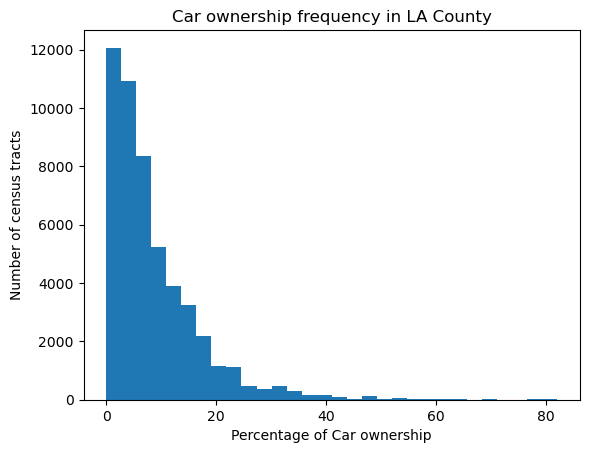

In [104]:
ax2=dfmerged['no_vehicle_pct'].plot.hist(bins=30)
ax2.set_xlabel('Percentage of Car ownership')
ax2.set_ylabel('Number of census tracts')
ax2.set_title('Car ownership frequency in LA County') 

## Group Members 
### Tomohiro Ujikawa  
Manager
### Simon Han
LA transportation specialist
### Xinyi Cao
Data Analyst
### Alain Jabbour
Internation Transportaiton consultant